# Classification model using Logistic Regression

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_binary_43.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,1,0.153994,-0.164904,-0.452284,0.206749,-0.857082,-0.603124,-0.473103,-0.075513,0.054750,...,-0.037600,-0.128832,-0.385064,0.116692,1.490244,1.059520,-1.272441,0.110960,-0.101009,0.161909
1,1,-1.300332,-0.080441,-0.885911,-0.168431,-0.529857,0.184833,-0.464027,-0.361125,0.125864,...,-0.443480,-0.222192,-0.440740,-0.388554,0.997358,0.816687,-1.113903,0.362072,-0.397896,1.188868
2,1,-0.876637,0.587383,-0.925414,0.488304,-0.181991,0.184868,-0.708685,1.060296,0.210958,...,0.440405,0.441728,0.479298,-0.410674,-0.082885,1.063791,-0.764444,0.862694,0.316916,1.723327
3,0,-1.598357,0.092854,-0.473400,-0.009476,-1.107011,0.699234,-1.599456,-0.220610,0.247359,...,-0.878015,-0.766315,-0.725781,-0.124278,0.621617,1.027331,-1.433755,0.882461,0.018591,1.787526
4,1,-1.735836,0.207939,-0.211755,-0.703383,-0.802869,-0.273099,-1.267936,-0.063031,-0.612482,...,-0.671282,1.156629,1.303665,0.926794,0.740702,-0.010802,0.001432,1.500137,0.100971,0.812671


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.

print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.153994 -0.164904 -0.452284  0.206749 -0.857082 -0.603124 -0.473103   
1   -1.300332 -0.080441 -0.885911 -0.168431 -0.529857  0.184833 -0.464027   
2   -0.876637  0.587383 -0.925414  0.488304 -0.181991  0.184868 -0.708685   
3   -1.598357  0.092854 -0.473400 -0.009476 -1.107011  0.699234 -1.599456   
4   -1.735836  0.207939 -0.211755 -0.703383 -0.802869 -0.273099 -1.267936   
..        ...       ...       ...       ...       ...       ...       ...   
176 -1.222742  0.033713 -0.588393 -0.369282 -0.914620  0.613994 -1.088500   
177 -0.916295  0.632799  0.010232  1.049555 -0.321448 -0.182999 -1.356915   
178 -0.499931  0.487778 -0.365115 -0.074394 -0.231141  0.391114 -0.622813   
179 -0.790637  0.102222 -1.135601 -0.301596 -0.794871  0.188501 -0.760856   
180 -0.297094  0.420879 -0.209357  0.319454 -0.118073 -0.411617 -1.117591   

            7         8         9  ...        33        34        35  \
0  

### 3. Train-Test dataset split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=125, stratify=Y)

print('Training set size:', len(X_train))
print('Target column size of the training set:', len(y_train))
print('Test set size:', len(X_test))
print('Target column size of the test set:', len(y_train))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 144


### 4. Select the parameters of the model and fit it

In [5]:
param_grid = {'C': [1,2,5,7,10],
            'max_iter':[1000000],
            'random_state':[125]}

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(LogisticRegression(), param_grid, cv = 5)
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 5, 7, 10], 'max_iter': [1000000],
                         'random_state': [125]})

In [6]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
model.fit(X_train , y_train)

Best estimate of parameters according to GridSearchCV:


LogisticRegression(C=5, max_iter=1000000, random_state=125)

In [7]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5768472906403941


In [8]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(X_train)
contTrain = 0
y_train=y_train.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_train),1) :
    if (yhatTrain[i] == y_train[i]):
        contTrain = contTrain + 1

In [9]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(X_test)
contTest = 0
y_test=y_test.to_numpy()

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(y_test),1) :
    if (yhatTest[i] == y_test[i]):
        contTest = contTest + 1

### 6. Results

In [10]:
print('Final accuracy on the training dataset:' + str(contTrain/len(y_train)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(y_test)))

Final accuracy on the training dataset:0.7291666666666666
Final accuracy on the testing dataset: 0.5135135135135135


In [11]:
from sklearn.metrics import classification_report,confusion_matrix
print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(y_train,yhatTrain))
print('Input data:  ' + str(np.array(y_train)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[50 18]
 [21 55]]
Input data:  [1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1]
Prediction:        [1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1
 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1]


In [12]:
print(classification_report(y_train,yhatTrain))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        68
           1       0.75      0.72      0.74        76

    accuracy                           0.73       144
   macro avg       0.73      0.73      0.73       144
weighted avg       0.73      0.73      0.73       144



In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhatTest)
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix)
print('Input data:  ' + str(np.array(y_test)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[ 6 11]
 [ 7 13]]
Input data:  [0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0]
Prediction:        [1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0]


In [14]:
print(classification_report(y_test, yhatTest))

              precision    recall  f1-score   support

           0       0.46      0.35      0.40        17
           1       0.54      0.65      0.59        20

    accuracy                           0.51        37
   macro avg       0.50      0.50      0.50        37
weighted avg       0.50      0.51      0.50        37



### 7. Results visualizaton

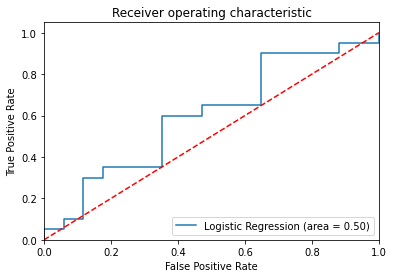

In [15]:
# En esta figrura se puede ver la proporción de falsos positivos con verdaderos positivos en el set de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()